# Trabajo Práctico Final - Electrónica Aplicada 3
### UTN - Facultad Regional de Avellaneda

### Enunciado

Oscilador con par diferencial de frecuencia variable, frecuencia central 12 MHz, tensión de salida 1 volt pico, apto para cargar con 50 ohm, una vez cumplido agregar ajuste de amplitud. O control aut de amplitud.

In [ ]:
# Instalación de librerías en caso de no tenerlas
#pip install engineering_notation
#pip install prettytable

# Útiles sin contexto
#import os
#print(os.path.realpath('.'))

### Cálculo de componentes del circuito, con fuente de corriente ideal y valores exactos.

In [116]:
# Herramientas útiles
import math
from engineering_notation import EngNumber
from prettytable import PrettyTable


# El símbolo de ohm en Unicode
ohm_symbol = "\u03A9"

# Datos
f_0 = 12.1*10**6    #NOTA: Se define 12.1MHz para garantizar que estemos por encima de 12MHz en la salida.
R_L = 50
a = 2
b = 5
Q_0 = 100
pi = math.pi
V_EE = -6
V_CC = 6

Para comenzar, se asume una bobina de 300nHy:

In [72]:
L = 300*(10**-9)
L_eng = EngNumber(L)

print("L = " + str(L_eng) + "Hy")

L = 300nHy


Con esta bobina, se calcula la capacidad equivalente para que el circuito resuene en 12MHz

$ C(eq) = \frac{1}{(2 \pi f_0)^{2} L} $

In [74]:
C_eq = 1/((2 * pi * f_0)**2 * L)
C_eq_eng = EngNumber(C_eq)

print("Ceq = " + str(C_eq_eng) + "F")

Ceq = 576.70pF


A partir de este punto, se comienza a calcular el capacitor C4, de forma de cumplir el enunciado y poder cargar con 50ohm a la salida. Para ello, se define que $X_{C4}$ debe ser aproximadamente 10 veces menor a $R_L$ y se asume:

In [75]:
X_C4 = 5

Aquí se podrá calcular $C_4$ y luego $C_3$.

$$ C_4 = \frac{1}{2 \pi f_0 X_{C4}} $$

$$ C_3 = \frac{C_4}{b-1} $$

In [76]:
C_4 = 1/(2*pi*f_0*X_C4)
C_4_eng = EngNumber(C_4)

C_3 = C_4 / (b - 1)
C_3_eng = EngNumber(C_3)

print("C4: " + str(C_4_eng) + "F")
print("C3: " + str(C_3_eng) + "F")

C4: 2.63nF
C3: 657.67pF


Por último, se obtiene la capacidad equivalente del divisor capacitivo de la salida:

$$ C_{eq_2} = \frac{C_3 C_4}{C_3 + C_4} $$

In [77]:
C_eq_2 = (C_3 * C_4)/(C_3 + C_4)
C_eq_2_eng = EngNumber(C_eq_2)

print("C_eq_2: " + str(C_eq_2_eng) + "F")

C_eq_2: 526.13pF


Se continúa calculando la capacidad equivalente de los capacitores $C_1$ y $C_2$. Hasta aquí no se considera Cvariable en el diseño del oscilador.

$$ C_{eq_1} = C_{eq} - C_{eq_2} $$

$$ C_2 = a  C_{eq_1} $$

$$ C_1 = \frac{C_2}{a - 1} $$

In [78]:
C_eq_1 = C_eq - C_eq_2
C_eq_1_eng = EngNumber(C_eq_1)



C_2 = a * C_eq_1
C_2_eng = EngNumber(C_2)


C_1 = C_2 / (a-1)
C_1_eng = EngNumber(C_1)


print("C_eq_1: "  + str(C_eq_1_eng) + "F")
print("C_2: "     + str(C_2_eng) + "F")
print("C_1: "     + str(C_1_eng) + "F")

C_eq_1: 50.57pF
C_2: 101.13pF
C_1: 101.13pF


Como se trabaja con una bobina ideal, se procede a calcular su $R_T$ y también la resistencia $R_L$ reflejada, para obtener la Rtotal siendo el paralelo entre ambas:

$$ R_T = Q_0 2 \pi f_0 L $$

$$ R'_L = R_L  b^{2} $$

$$ R_{TOTAL} = \frac{R_T R'_L}{R_T + R'_L} $$

In [79]:
R_T = Q_0 * 2 * pi * f_0 * L
R_T_eng = EngNumber(R_T)

R_L_PRIMA = R_L * b**2
R_L_PRIMA_eng = EngNumber(R_L_PRIMA)

R_TOTAL = (R_T * R_L_PRIMA)/(R_T + R_L_PRIMA)
R_TOTAL_eng = EngNumber(R_TOTAL)


print("R_T: "           + str(R_T_eng) + ohm_symbol)
print("R_L_PRIMA: "     + str(R_L_PRIMA_eng) + ohm_symbol)
print("R_TOTAL: "       + str(R_TOTAL_eng) + ohm_symbol)

R_T: 2.28kΩ
R_L_PRIMA: 1.25kΩ
R_TOTAL: 807.47Ω


Finalmente, se plantea el siguiente circuito ideal, considerando una fuente de corriente ideal que entrega 10mA al par diferencial. Habiendo calculado los siguientes valores:

In [80]:
table = PrettyTable()
table.field_names = ["Componente", "Valor"]

table.add_row(["C1", str(C_1_eng) + "F" ])
table.add_row(["C2", str(C_2_eng) + "F" ])
table.add_row(["C3", str(C_3_eng) + "F" ])
table.add_row(["C4", str(C_4_eng) + "F" ])
table.add_row(["Rt", str(R_T_eng) + ohm_symbol ])
table.add_row(["L",   str(L_eng) +  "Hy"])

print(table)

+------------+----------+
| Componente |  Valor   |
+------------+----------+
|     C1     | 101.13pF |
|     C2     | 101.13pF |
|     C3     | 657.67pF |
|     C4     |  2.63nF  |
|     Rt     |  2.28kΩ  |
|     L      |  300nHy  |
+------------+----------+


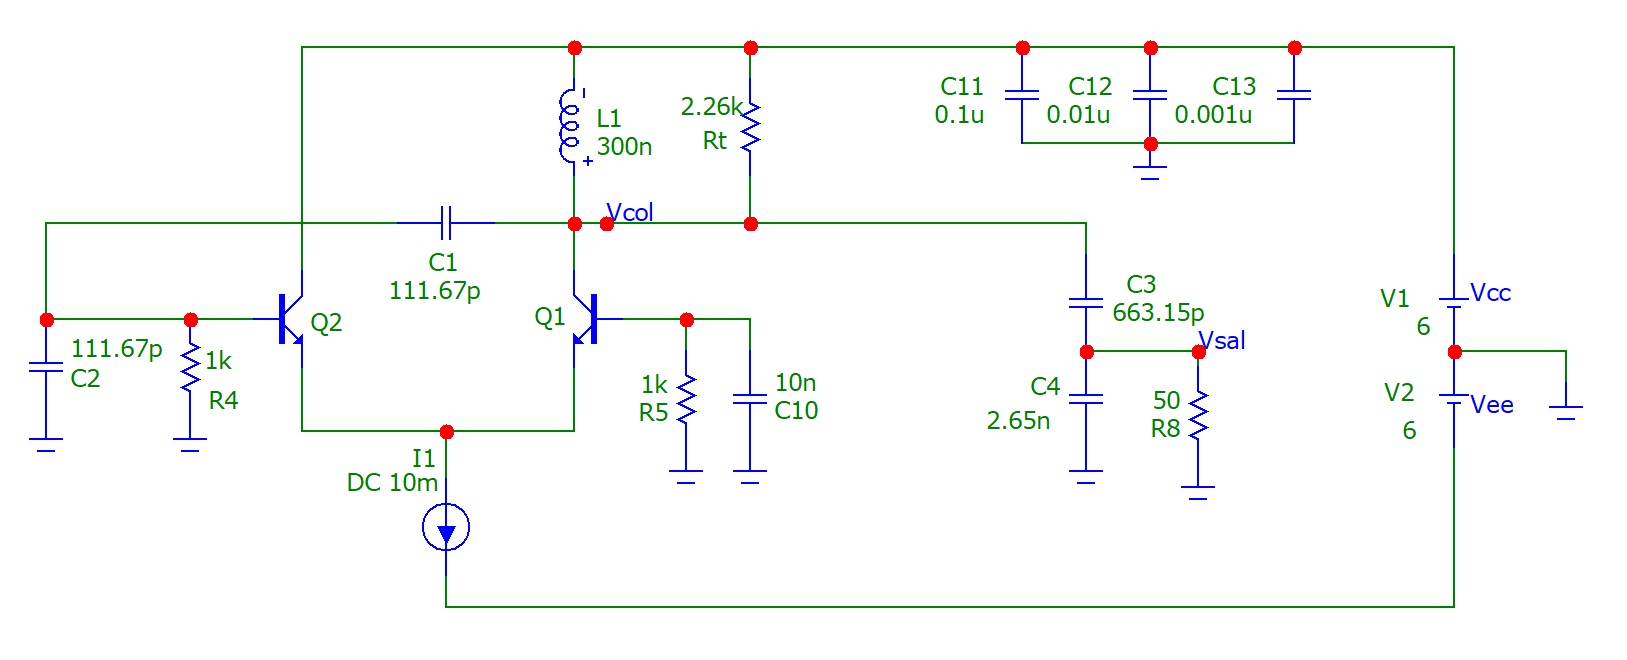

#### Formas de onda

! [Vcol - circuito ideal con fuente de corriente.png](<attachment:Vcol - circuito ideal con fuente de corriente.png>)

! [Vsal - circuito ideal con fuente de corriente.png.png](<attachment:Vsal - circuito ideal con fuente de corriente.png.png>)

Se puede apreciar que:

$ V_{col_{max}} = 10.271 V $

$ V_{col_{min}} = 01.727 V $



$ V_{sal_{max}} =  852.593 mV $

$ V_{sal_{min}} = -853.125 mv $

In [68]:
v_col_max = 10.271
v_col_min = 1.727

v_sal_max = 852.593 * (10**(-3))
v_sal_min = -853.125 * (10**(-3))


TENSION_CONTINUA = ((v_col_max - v_col_min ) / 2) + v_col_min
TENSION_CONTINUA_eng = EngNumber(TENSION_CONTINUA)

print("Tensión continua: " + str(TENSION_CONTINUA_eng) + "V")

TENSION_PICO_COLECTOR = v_col_max - TENSION_CONTINUA
TENSION_PICO_COLECTOR_eng = EngNumber(TENSION_PICO_COLECTOR)

print("Tensión pico de colector: " + str(TENSION_PICO_COLECTOR_eng) + "V")

Tensión continua: 6V
Tensión pico de colector: 4.27V


Desde Scope -> Go to Performance, podemos apreciar que se encuentra trabajando sobre los $12MHz$:

![performance de circuito ideal con fuente de corriente.png](<attachment:Recursos\performance de circuito ideal con fuente de corriente.png>)

### Reemplazo de fuente de corriente ideal por fuente espejo.

Se propone una estructura que incluya una fuente de corriente espejo en reemplazo a la fuente de corriente ideal.

Aquí se incluyen:
1. $R_{10}$: esta resistencia se considera un shunt sólo para evaluar la corriente que aporta la fuente espejo al circuito.
2. $R_{pol}$: esta resistencia se encarga de polarizar la fuente espejo. Será un potenciómetro en la realidad.
3. $R_2$ y $R_3$: estas resistencias se encargan de polarizar la fuente espejo.

Para calcular la corriente que aporta la fuente espejo, utilizaremos la siguiente fórmula:

$$ R_{pol} = \frac{V_{EE} - 0.7v - I_E R_E}{I_E} $$

Definiendo:

$ R_E = R_2 = R_3 = 330 \mathsf{\Omega} $

$ I_E = 10mA $

Entonces:

In [113]:
R_E = 330
I_E = 10*10**-3

R_pol = ( -V_EE - 0.7 - (I_E * R_E))/(I_E)
R_pol_eng = EngNumber(R_pol)

print("La resistencia de polarización será Rpol = " + str(R_pol_eng) + ohm_symbol)

La resistencia de polarización será Rpol = 200Ω


Por lo que se implementa la siguiente estructura:

![esquematico - reemplazo por fuente de corriente espejo.png](<attachment:Recursos\esquematico de reemplazo por fuente de corriente espejo.png>)

Una vez implementada, se simula el circuito obteniendo una corriente sobre el shunt $R_{10}$ de $9.96mA$ como se aprecia en la próxima figura:

![corriente sobre R10 - reemplazo por fuente de corriente espejo.png](<attachment:Recursos\corriente sobre R10 de reemplazo por fuente de corriente espejo.png>)

### Estandarización de componentes a valores comerciales

Ahora, teniendo el circuito esquemático final, se normalizan los valores de los capacitores a valores comerciales, previendo la fabricación del dispositivo:

| Componente | Valor Calculado | Valor Comercial |
|------------|-----------------|-----------------|
| $C_1$      | 101.13p         | 100p            |
| $C_2$      | 101.13p         | 100p            |
| $C_3$      | 657.67p         | 680p            |
| $C_4$      | 2.63n           | 2.7n            |


No se normalizan los valores de $R_2$ y $R_3$ por haber planteado valores comerciales y porque $R_{pol}$ será una resistencia variable. Tampoco $R_T$ por ser la resistencia asociada a la bobina real $L$.

Finalmente contaremos con el siguiente circuito:

![esquematico - circuito real con valores comerciales.png](<attachment:Recursos\esquematico de circuito real con valores comerciales.png>)

Al simular el circuito anterior, se obtiene el siguiente resultado de performance:

![performance - circuito real con valores comerciales.png](<attachment:Recursos\performance de circuito real con valores comerciales.png>)

Donde se observa que el circuito oscila a una $f_0$ = 1.1901 MHZ 